Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in first file: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns in second file: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns in third file: Index(['PassengerId', 'Survived'], dtype='object')
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   flo

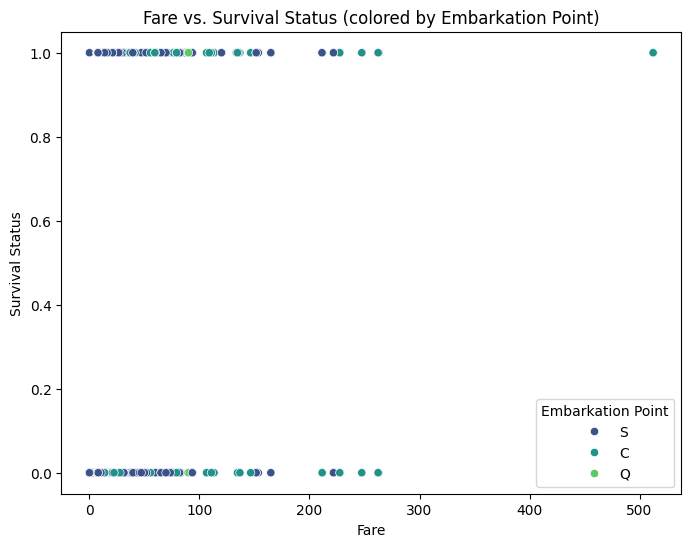


Survival rates by 'Who' categories:
Who
Child    0.539130
Man      0.112245
Woman    0.839024
Name: Survived, dtype: float64


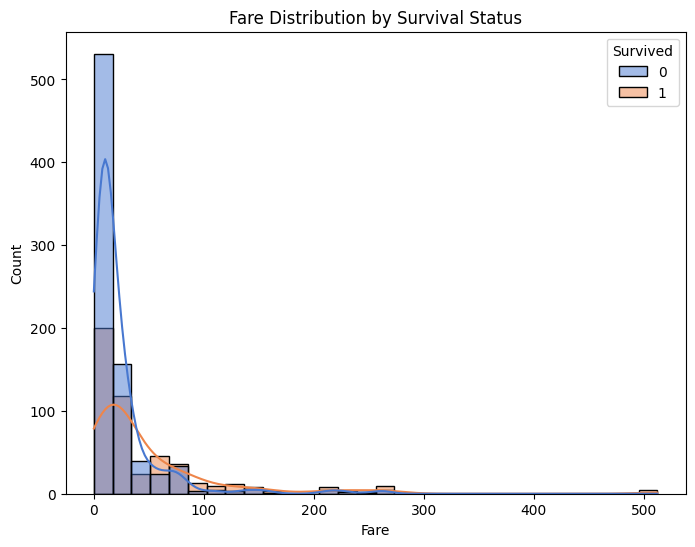


Survival rate for passengers in large families (FamilySize > 4):
0.21951219512195122


In [2]:
#part1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#part2
drive.mount('/content/drive')

#part3
file1_path = '/content/drive/My Drive/titanic.csv'
file2_path = '/content/drive/My Drive/titanic2.csv'
file3_path = '/content/drive/My Drive/titanic2extension2.csv'

#part4
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)

#part5
print("Columns in first file:", df1.columns)
print("Columns in second file:", df2.columns)
print("Columns in third file:", df3.columns)

# Merge part
df2_complete = pd.merge(df2, df3, on='PassengerId', how='left')
final_combined_data = pd.concat([df1, df2_complete], ignore_index=True)
output_path = '/content/drive/My Drive/final_combined_excel_file.csv'
final_combined_data.to_csv(output_path, index=False)
titanic_data = pd.read_csv(output_path)

#part6
print("Dataset Overview:")
print(titanic_data.info())

#questionpart1
highest_fare_passenger = titanic_data.loc[titanic_data['Fare'].idxmax()]
print("\nPassenger with the highest fare:")
print(highest_fare_passenger[['Name', 'Fare', 'Survived']])

#questionpart2
average_age = titanic_data.groupby(['Sex', 'Pclass'])['Age'].mean()
print("\nAverage age by gender and class:")
print(average_age)

#questionpart3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_data, x='Fare', y='Survived', hue='Embarked', palette='viridis')
plt.title('Fare vs. Survival Status (colored by Embarkation Point)')
plt.xlabel('Fare')
plt.ylabel('Survival Status')
plt.legend(title='Embarkation Point')
plt.show()

#questionpart4
titanic_data['Who'] = np.where(titanic_data['Age'] < 16, 'Child', titanic_data['Sex'].map({'male': 'Man', 'female': 'Woman'}))
survival_rates = titanic_data.groupby('Who')['Survived'].mean()
print("\nSurvival rates by 'Who' categories:")
print(survival_rates)

#questionpart5
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_data, x='Fare', hue='Survived', kde=True, bins=30, palette='muted')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

#questionpart6
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
large_families = titanic_data[titanic_data['FamilySize'] > 4]
large_family_survival_rate = large_families['Survived'].mean()
print("\nSurvival rate for passengers in large families (FamilySize > 4):")
print(large_family_survival_rate)
